In [1]:

import numpy as np
import matplotlib.pyplot as plt
import sympy as sy

In [2]:
# problem 9.9a
def bary_weights(points):
	" takes points (array) and returns barycentric weights (array)"
	weights = np.ones_like(points)

	# Using the weights generation method
	for j in range(len(weights)):
		for i in range(len(weights)):
			if i != j:
				weights[j] *= (points[j] - points[i])
		weights[j] = 1.0 / weights[j]
	return weights


# problem 9.9b
def eval_poly(x, y, x0):
	" takes in x (array), y (array), x0 (float), returns interpolation at x (float)"
	# If the value already exists in the array-
	if x0 in x:
		return y[list(x).index(x0)]

	# Find weights
	weights = bary_weights(x)

	# Calculate the fraction
	weight_frac = weights / (x0 - x)

	# Calculate the value
	val = np.sum(weight_frac * y) / np.sum(weight_frac)
	return val


# 9.25

Use barycentric Lagrange interpolation to find the degree-3 interpolating polynomial for the data $(–1, \sin(–\pi))$, $(–1/3, \sin(–\pi/3))$, $(1/3, \sin(\pi/3))$, and $(1, \sin(\pi))$; that is, interpolate through the points $\{(x_j, \sin(\pi x_j))\}_{j=0}^3$ for $x_0 = –1, x_1 = -1/3, x_2 = 1/3,$ and $x_3 = 1$. Plot your answer and the function $\sin(x\pi)$ on the interval $[-1, 1]$. 

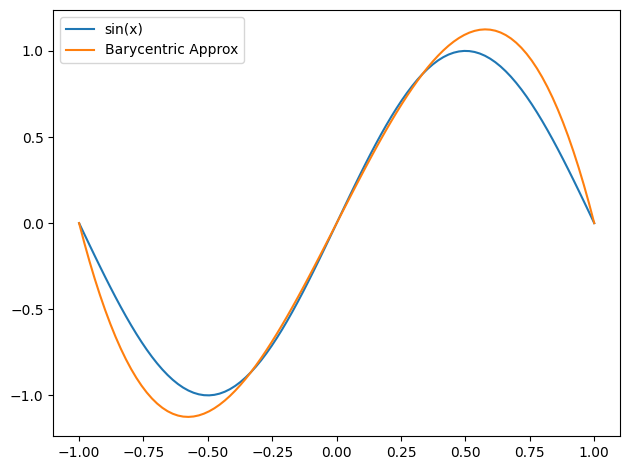

In [3]:
# problem 9.25
def prob_9_25():
	sample_domain = np.linspace(-1,1,100)
	domain = [-1, -1/3, 1/3, 1]
	y_range = [np.sin(i*np.pi) for i in domain]

	# Compute the interpolation of sin(x)
	sample = np.array([eval_poly(domain,y_range,x) for x in sample_domain])

	# Plot both
	plt.plot(sample_domain, np.sin(np.pi * sample_domain), label="sin(x)")
	plt.plot(sample_domain, sample, label="Barycentric Approx")
	plt.tight_layout()
	plt.legend()
	plt.show()

prob_9_25()

# 9.26

Repeat the previous problem, but instead use the Chebyshev extremizers $y_j = \cos(j\pi/3)$; that is, interpolate through the points $\{(y_j, \sin(\pi y_j))\}_{j=0}^3$. On the interval $[-1, 1]$ plot your answer along with the function $\sin(x\pi)$ and your answer to the previous problem. 

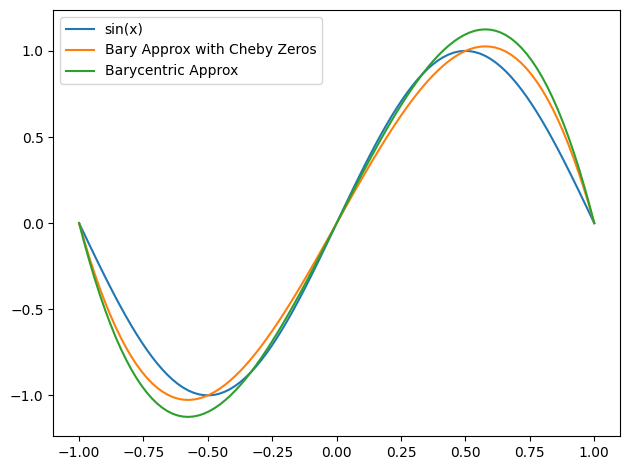

In [4]:
# problem 9.26
def prob_9_26():
	sample_domain = np.linspace(-1,1,100)

	bery_domain = [-1, -1/3, 1/3, 1]
	bery_y_range = [np.sin(i*np.pi) for i in bery_domain]

	cheby_domain = [np.cos(j*np.pi/3) for j in range(4)]
	cheby_y_range = [np.sin(i*np.pi) for i in cheby_domain]

	# Compute the interpolation of sin(x)
	bery_sample = np.array([eval_poly(bery_domain,bery_y_range,x) for x in sample_domain])
	cheby_sample = np.array([eval_poly(cheby_domain,cheby_y_range,x) for x in sample_domain])

	# Plot both
	plt.plot(sample_domain, np.sin(np.pi * sample_domain), label="sin(x)")
	plt.plot(sample_domain, cheby_sample, label="Bary Approx with Cheby Zeros")
	plt.plot(sample_domain, bery_sample, label="Barycentric Approx")
	plt.tight_layout()
	plt.legend()
	plt.show()

prob_9_26()

# 9.28

Let $z_{1}^{\prime},...,z_{20}^{\prime}$ be the points in $[1, 20]$ corresponding to the degree-20 Chebyshev zeros, as computed in the previous problem. Plot the polynomial $q(x) = \prod_{i=1}^{20} (x-z_{i}^{\prime})$, on the interval $[1, 20]$, and plot the Wilkinson polynomial $W(x)$ on the same graph. Compute $\sup_{x \in [1,20]} q(x)$, and compare this to $\sup_{x \in [1,20]} W(x)$. 

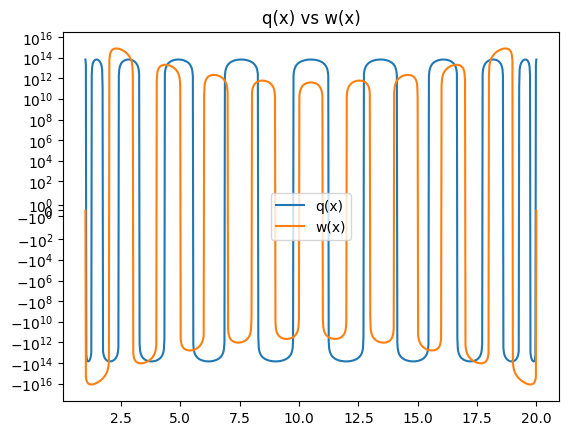

sup(q(x)): 68375763398888.55
sup(w(x)): 803376869378216.2
sup(abs(q(x))): 68375763398888.55
sup(abs(w(x))): 1.1829066901717614e+16


In [8]:
# Helper functions
def shift(a, b, x):
    return (a+b)/2 + (b-a)/2 * x

def poly_gen(x, zeros):
    for z in zeros:
        yield x - z

n = 20

# Get the Chebyshev zeros and y-values
cheby_domain = [shift(1, 20, np.cos(np.pi/n*(j+1/2))) for j in range(n)]
# cheby_y_range = [shift(1, 20, np.sin(i*np.pi)) for i in cheby_domain]

x = sy.symbols('x')

# Find q(x)
q = sy.lambdify(x, np.prod(list(poly_gen(x, cheby_domain))))

# Find w(x)
w = sy.lambdify(x, np.prod(list(poly_gen(x, [i for i in range(1, 21)]))), 'numpy')


# Plot the interpolating polynomials and print the supremums
domain = np.linspace(1, 20, 1000)
q_range = q(domain)
w_range = w(domain)
plt.plot(domain, q_range, label="q(x)")
plt.plot(domain, w_range, label="w(x)")
plt.title("q(x) vs w(x)")
plt.legend()
plt.yscale("symlog")
plt.show()

print(f"sup(q(x)): {np.max(q_range)}")
print(f"sup(w(x)): {np.max(w_range)}")
print(f"sup(abs(q(x))): {np.max(np.abs(q_range))}")
print(f"sup(abs(w(x))): {np.max(np.abs(w_range))}")